# (4주차) 9월26일 -- draft
> 산점도 응용예제 4 (무상관과 독립)

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

## imports 

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

## 산점도 응용예제 4 (무상관과 독립)

### 예제자료 

**예시1: 사각형**

`-` 아래와 같은 자료를 고려하자. 

In [2]:
np.random.seed(43052)
x1=np.random.uniform(low=-1,high=1,size=100000)
y1=np.random.uniform(low=-1,high=1,size=100000)

Text(0.5, 1.0, 'rect')

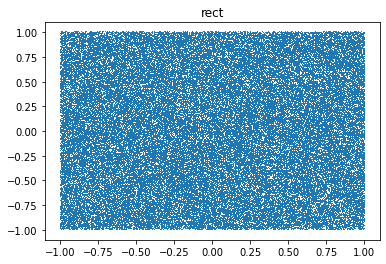

In [3]:
plt.plot(x1,y1,',')
plt.title('rect')

**예시2: 원**

`-` 예제자료 만들기..

In [4]:
np.random.seed(43052)
_x=np.random.uniform(low=-1,high=1,size=100000)
_y=np.random.uniform(low=-1,high=1,size=100000)

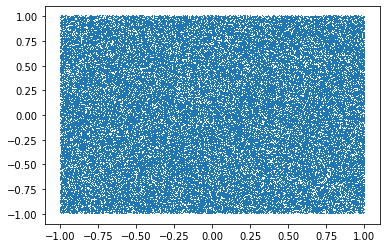

In [5]:
plt.plot(_x,_y,',')

In [6]:
radius = _x**2+_y**2 

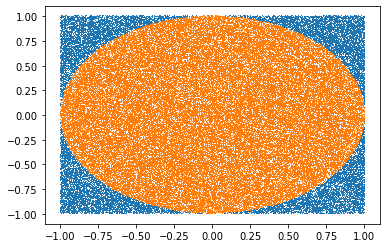

In [7]:
x2=_x[radius<1]
y2=_y[radius<1]
plt.plot(_x,_y,',')
plt.plot(x2,y2,',')

`-` 아래와 같이 자료를 관측했다고 하자. 

Text(0.5, 1.0, 'circ')

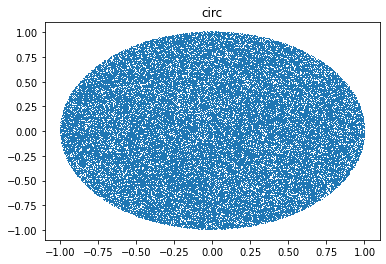

In [8]:
plt.plot(x2,y2,',')
plt.title('circ')

**예시3: 이변량정규분포**

In [9]:
np.random.seed(43052)
x3=np.random.normal(size=10000)
y3=np.random.normal(size=10000)

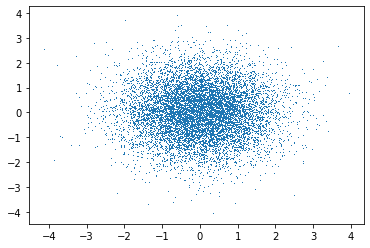

In [10]:
plt.plot(x3,y3,',')

### 상관계수 

`-` 예시1, 예시2, 예시3의 산점도를 보고 상관계수가 얼마인지 예상해보라. 실제 계산결과와 확인하라. 

In [11]:
np.corrcoef(x1,y1)

array([[1.        , 0.00521001],
       [0.00521001, 1.        ]])

In [12]:
np.corrcoef(x2,y2)

array([[ 1.        , -0.00362687],
       [-0.00362687,  1.        ]])

In [13]:
np.corrcoef(x3,y3)

array([[ 1.        , -0.01007718],
       [-0.01007718,  1.        ]])

### 독립 

`-` 예시1,2,3 중 독립인것은 무엇인가? 

`-` 예시1 vs 예시2

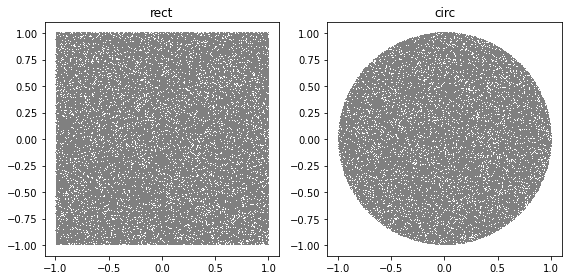

In [14]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4))
ax1.plot(x1,y1,',',color='gray')
ax2.plot(x2,y2,',',color='gray')
ax1.set_title('rect')
ax2.set_title('circ') 
fig.tight_layout()

In [15]:
def g(interval,data,ax,col='r'):
    a,b = interval
    x,y = data
    i = (a<x)&(x<b) 
    #ax.plot(x,y,',',color='gray') 
    ax.plot(x[i],y[i],',',color=col) 

In [16]:
g([0.85,0.95],[x1,y1],ax1)
g([0.85,0.95],[x2,y2],ax2)

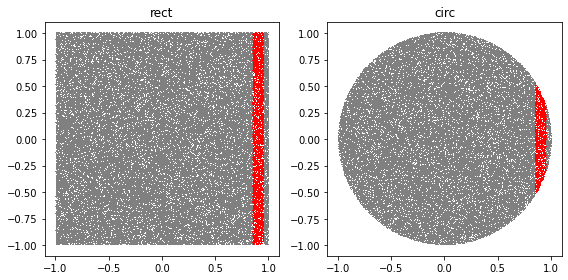

In [17]:
fig

In [18]:
g([0.05,0.15],[x1,y1],ax1,col='b')
g([0.05,0.15],[x2,y2],ax2,col='b')

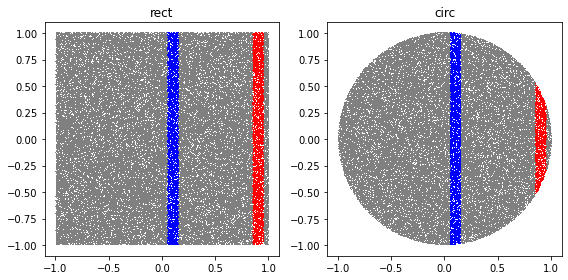

In [19]:
fig

`-` 예시3

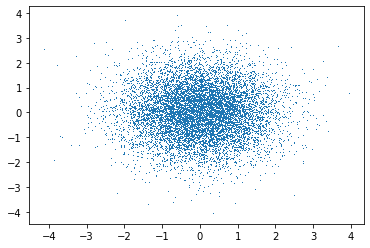

In [20]:
plt.plot(x3,y3,',')

In [21]:
def h(interval, data, ax, col='r'):
    a,b = interval
    x,y = data
    idx = (a<x)&(x<b) 
    ax.hist(y[idx],color=col)

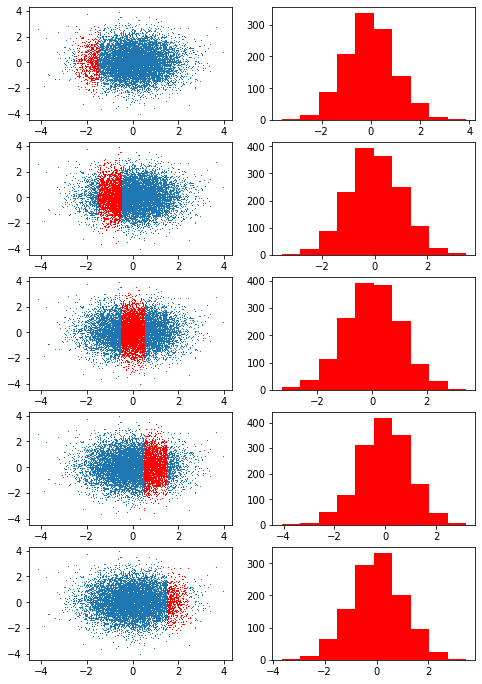

In [22]:
fig , ax = plt.subplots(5,2,figsize=(8,12))

ax[0,0].plot(x3,y3,','); g([-2.5,-1.5],[x3,y3],ax[0,0])
ax[1,0].plot(x3,y3,','); g([-1.5,-0.5],[x3,y3],ax[1,0])
ax[2,0].plot(x3,y3,','); g([-0.5,+0.5],[x3,y3],ax[2,0])
ax[3,0].plot(x3,y3,','); g([+0.5,+1.5],[x3,y3],ax[3,0])
ax[4,0].plot(x3,y3,','); g([+1.5,+2.5],[x3,y3],ax[4,0])

h([-1.0,-0.6],[x3,y3],ax[0,1])
h([-0.6,-0.2],[x3,y3],ax[1,1])
h([-0.2,+0.2],[x3,y3],ax[2,1])
h([+0.2,+0.6],[x3,y3],ax[3,1])
h([+0.6,+1.0],[x3,y3],ax[4,1])

## matplotlib에 대한 미세먼지팁... 

### 그림만 보고 싶을때 

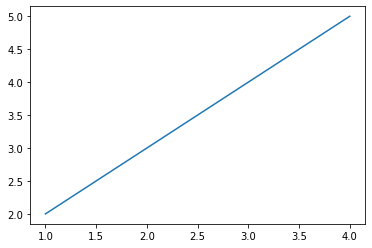

In [25]:
plt.plot([1,2,3,4],[2,3,4,5]);

### plt.show()

### marker size, line width 

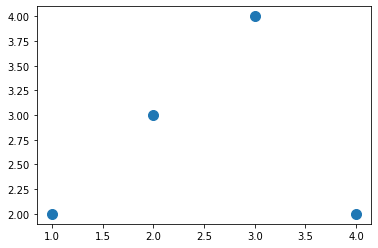

In [342]:
plt.plot([1,2,3,4],[2,3,4,2],'o',ms=10)

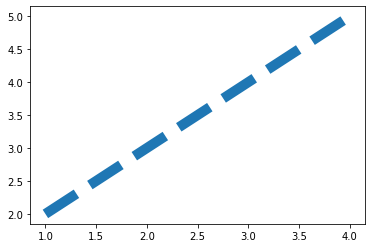

In [344]:
plt.plot([1,2,3,4],[2,3,4,5],'--',lw=10)

### label + legend 

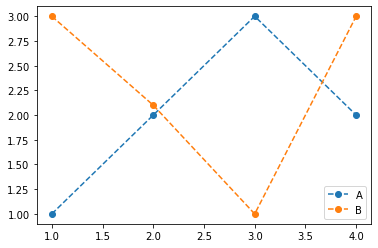

In [15]:
plt.plot([1,2,3,4],[1,2,3,2],'--o',label='A')
plt.plot([1,2,3,4],[3,2.1,1,3],'--o',label='B')
plt.legend()

### 색깔조정 (C0,C1,)

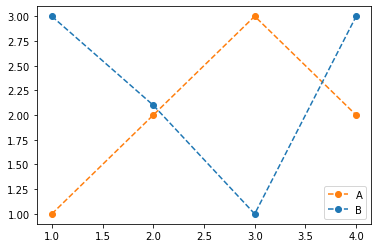

In [16]:
plt.plot([1,2,3,4],[1,2,3,2],'--o',label='A',color='C1')
plt.plot([1,2,3,4],[3,2.1,1,3],'--o',label='B',color='C0')
plt.legend()

### title 설정 

`-` (방법1)

Text(0.5, 1.0, 'title')

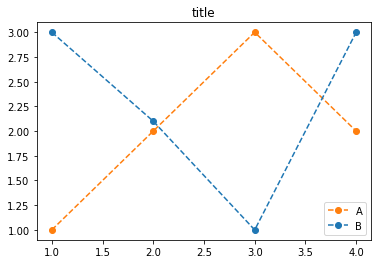

In [18]:
plt.plot([1,2,3,4],[1,2,3,2],'--o',label='A',color='C1')
plt.plot([1,2,3,4],[3,2.1,1,3],'--o',label='B',color='C0')
plt.legend()
plt.title('title')

`-` (방법2)

Text(0.5, 1.0, 'title')

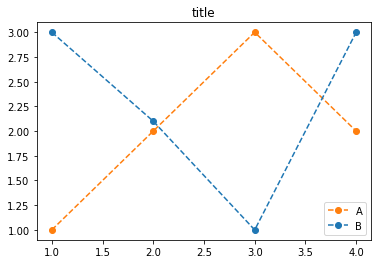

In [26]:
fig, ax = plt.subplots()
ax.plot([1,2,3,4],[1,2,3,2],'--o',label='A',color='C1')
ax.plot([1,2,3,4],[3,2.1,1,3],'--o',label='B',color='C0')
ax.legend()
ax.set_title('title')

### suptitle 설정 

Text(0.5, 0.98, 'suptitle')

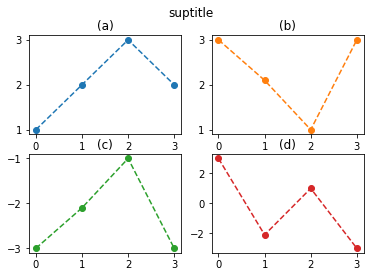

In [46]:
fig, ax = plt.subplots(2,2)
ax[0,0].plot([1,2,3,2],'--o',label='A',color='C0')
ax[0,0].set_title('(a)')
ax[0,1].plot([3,2.1,1,3],'--o',label='B',color='C1')
ax[0,1].set_title('(b)')
ax[1,0].plot([-3,-2.1,-1,-3],'--o',label='B',color='C2')
ax[1,0].set_title('(c)')
ax[1,1].plot([3,-2.1,1,-3],'--o',label='B',color='C3')
ax[1,1].set_title('(d)')
#plt.suptitle('suptitle')
fig.suptitle('suptitle')

### tight_layout()

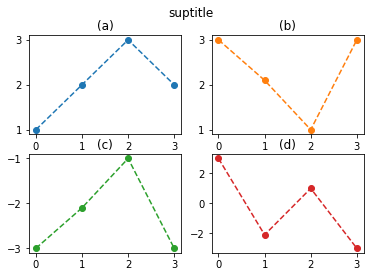

In [47]:
fig

In [48]:
fig.tight_layout()

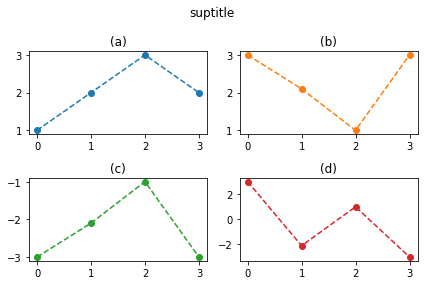

In [49]:
fig

### `fig`, `ax`, `plt` 소속

`-` 일단 그림하나 그리고 이야기좀 해보자. 

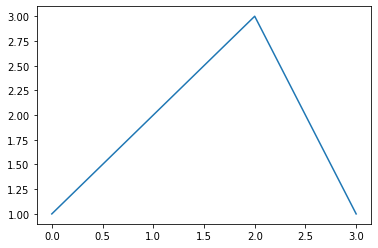

In [55]:
fig, ax = plt.subplots()
ax.plot([1,2,3,1])

`-` fig에는 있고 ax에는 없는것 

add_axes, tight_layout, suptitle, ... 

`-` ax에는 있고 fig에는 없는것 

boxplot, hist, plot, set_title, ... 

`-` plt는 근데 대부분 다 있다. (의미상 명확한건 대충 알아서 fig, ax에 접근해서 처리해준다) 

- plt.tight_layout, plt.suptitle, plt.boxplot, plt.hist, plot.plot
- plt.set_title 은 없지만 plt.title 은 있음
- plt.add_axes 는 없음.. 

### gcf, gca

`-` gcf

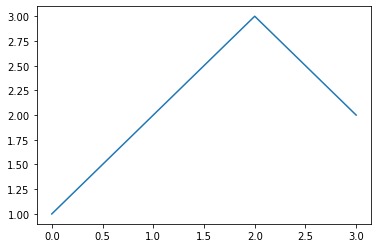

In [330]:
plt.plot([1,2,3,2])
fig = plt.gcf()

In [331]:
fig.suptitle('suptitle')

Text(0.5, 0.98, 'suptitle')

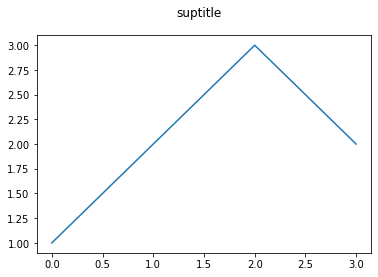

In [332]:
fig

`-` gca

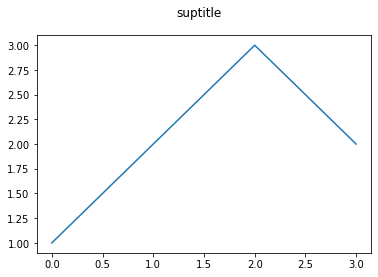

In [334]:
fig

In [335]:
ax = fig.gca()

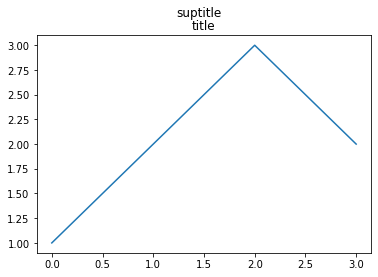

In [338]:
ax.set_title('title') 
fig

`-` 2개이상의 액시즈가 존재할경우 

### x축, y축 label 설정 

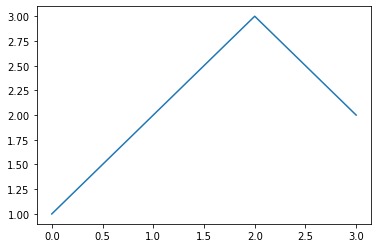

In [224]:
fig,ax = plt.subplots()
ax.plot([1,2,3,2])

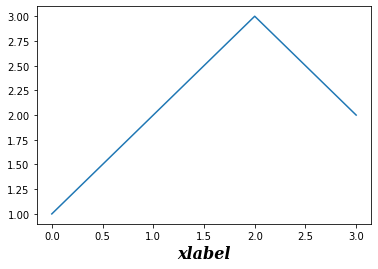

In [241]:
ax.set_xlabel('xlabel',
                        size=16,
                        family='serif',
                        weight=1000,
                        style='italic')
#_fontsettings={'size':16,'family':'serif','weight'=1000,'style':'italic'}
#ax.xaxis.set_label_text('xlabel',_fontsettings)
fig

[폰트ref](https://matplotlib.org/stable/api/font_manager_api.html#matplotlib.font_manager.FontProperties)
- size: 
- fontweight: 0~1000 
- family: 'serif', 'sans-serif', 'monospace'
- style: 'normal', 'italic'

In [240]:
plt.rcParams.find_all('font')

RcParams({'font.cursive': ['Apple Chancery',
                           'Textile',
                           'Zapf Chancery',
                           'Sand',
                           'Script MT',
                           'Felipa',
                           'Comic Neue',
                           'Comic Sans MS',
                           'cursive'],
          'font.family': ['sans-serif'],
          'font.fantasy': ['Chicago',
                           'Charcoal',
                           'Impact',
                           'Western',
                           'Humor Sans',
                           'xkcd',
                           'fantasy'],
          'font.monospace': ['DejaVu Sans Mono',
                             'Bitstream Vera Sans Mono',
                             'Computer Modern Typewriter',
                             'Andale Mono',
                             'Nimbus Mono L',
                             'Courier New',
                             '

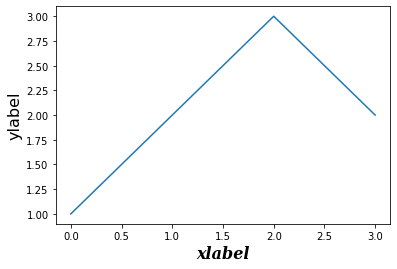

In [245]:
ax.set_ylabel('ylabel',size=16)
fig

### Latex 

`-` 예시1

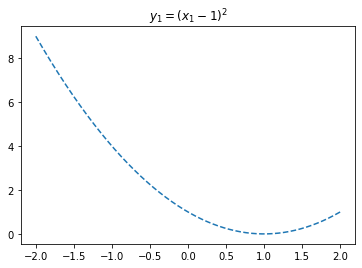

In [303]:
x1= np.linspace(-2,2,1000)
y1= (x1-1)**2 
plt.plot(x1,y1,'--')
plt.title('$y_1=(x_1-1)^2$');

`-` 예시2

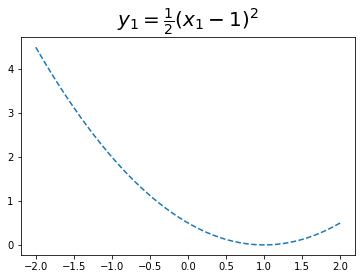

In [302]:
x1 = np.linspace(-2,2,1000)
y1 = 0.5*(x1-1)**2 
plt.plot(x1,y1,'--')
plt.title(r'$y_1=\frac{1}{2}(x_1-1)^2$',size=20);

`-` 예시3

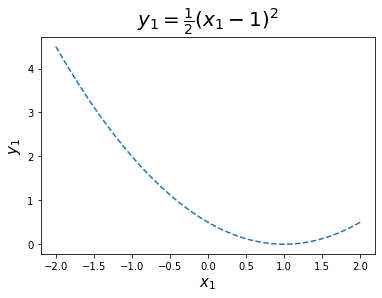

In [301]:
x1 = np.linspace(-2,2,1000)
y1 = 0.5*(x1-1)**2 
plt.plot(x1,y1,'--')
plt.title(r'$y_1=\frac{1}{2}(x_1-1)^2$',size=20)
plt.xlabel(r'$x_1$',size=15)
plt.ylabel(r'$y_1$',size=15);

`-` 예시4

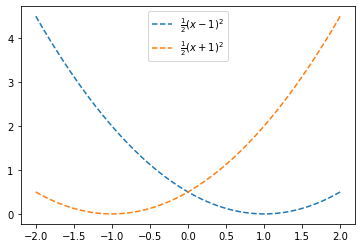

In [304]:
x1 = np.linspace(-2,2,1000)
y1 = 0.5*(x1-1)**2 
y2 = 0.5*(x1+1)**2
plt.plot(x1,y1,'--',label=r'$\frac{1}{2}(x-1)^2$')
plt.plot(x1,y2,'--',label=r'$\frac{1}{2}(x+1)^2$')
plt.legend()